In [42]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import random as ran
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import os

In [43]:
data = []
labels = []

train_path = "./data/imgs/"

IMG_SIZE = 128

for file in os.listdir(train_path):
    img=cv2.imread(train_path+file,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    img=img.astype('float32')
    
    data.append(img)
    if(file.split('.')[0] == 'dog'):
        labels.append(0)
    else:
        labels.append(1)

    
data = np.array(data)
labels = np.array(labels)

In [44]:
data.shape

(25000, 128, 128)

In [45]:

#reshape images
input_shape = (128, 128, 1)
data=data.reshape(data.shape[0], data.shape[1], data.shape[2], 1)

#Normalize data
data = data/255.0


In [46]:
data.shape

(25000, 128, 128, 1)

In [47]:
n = data.shape[0]
n

25000

In [48]:
from sklearn.model_selection import train_test_split

# We have comined the test and the training data, as all the cat images come first, so here we create a split with random shuffle.

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=69)

In [49]:
#Onehot encode the labels
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

In [50]:
y_test.shape

TensorShape([5000, 2])

In [51]:
# Split in mini-batches (partitions) to be input together
batch_size = 256

# Number of batches
m = int(n/batch_size)
m

97

In [57]:
# Define the topology of the neural network
# Number of classes in output layer
classes = 2

# Number of epochs
epochs = 20

# Learning rate
learning_rate = 0.001

In [53]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dense, Dropout
from keras.optimizers import Adam

In [59]:
model = Sequential()
model.add(Input(input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))


model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,322 (12.60 MB)

 Trainable params: 3,304,322 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(X_train, y_train, batch_size=batch_size, validation_split=0.15, epochs=epochs)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 190ms/step - accuracy: 0.4991 - loss: 0.8614 - val_accuracy: 0.5383 - val_loss: 0.6910
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.5559 - loss: 0.6846 - val_accuracy: 0.6140 - val_loss: 0.6615
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.6457 - loss: 0.6355 - val_accuracy: 0.6973 - val_loss: 0.5717
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.7012 - loss: 0.5687 - val_accuracy: 0.7157 - val_loss: 0.5491
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.7267 - loss: 0.5440 - val_accuracy: 0.7253 - val_loss: 0.5390
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.7458 - loss: 0.5190 - val_accuracy: 0.7577 - val_loss: 0.4953
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.7638 - loss: 0.4934 - val_accuracy: 0.7773 - val_loss: 0.4668
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.7833 - loss: 0.4686 - val_accu

In [62]:
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss          = history.history['loss']
val_loss      = history.history['val_loss']


In [63]:
#The model is a bit overfitted, but we werent able to tune it better

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


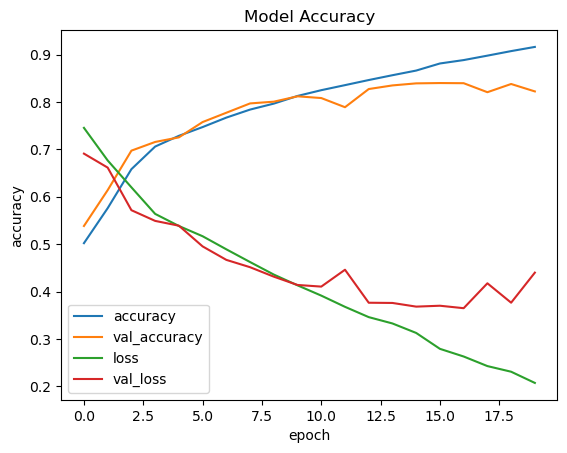

In [64]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.plot(loss)
plt.plot(val_loss)

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["accuracy", "val_accuracy", "loss", "val_loss"])
print(history.history.keys())
plt.show()

In [65]:
test_loss, test_acc = model.evaluate(X_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8110 - loss: 0.4454


In [66]:
test_acc

0.8131999969482422

In [67]:
test_loss

0.4341544508934021

# Discussion

### a. Based on your experience, how would you define ANN and CNN?
- ANN is a neural notwork consisting of layers of neurons or perptrons, feeding data forward until it reaches the output node.
- CNN contains convolutional layers which exctrat features from images before sending it further, the layers can then either be pooled or connected. 

### b. Which hyper-parameters of the CNN architecture have you fine-tuned?
- We played around with epochs, learning rate and the batch size.
- when testing the model we often had a traning accuracy which was a lot higher than the test accuracy. So we added dropouts, which decresed our training accuracy, but increased our test accuracy.

### c. Which is the role of the activation functions in ANN? Which of them you have implemented? Illustrate them.


### c. Which is the role of the activation functions in ANN? Which of them you have implemented? Illustrate them.
- we used both sigmoid and relu, but relu seems to have performed better in our case

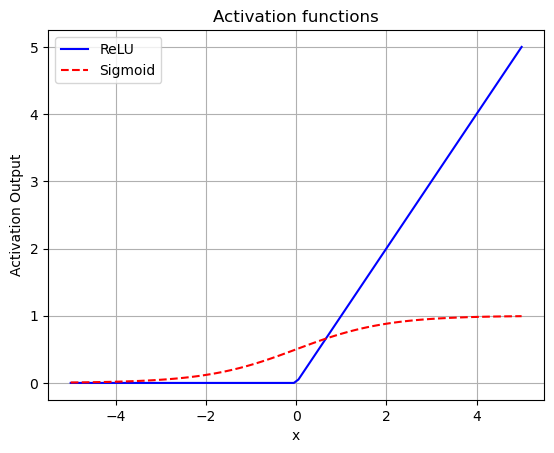

In [68]:
x = np.linspace(-5, 5, 100)

y_relu = np.maximum(0, x)
y_sigmoid = 1 / (1 + np.exp(-x))
plt.plot(x, y_relu, label='ReLU', color='blue')
plt.plot(x, y_sigmoid, label='Sigmoid', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Activation Output')
plt.title('Activation functions')
plt.grid(True)
plt.legend()
plt.show()

### d. Can you see any advantages and disadvantages of ANN and CNN used for classification in comparison to the other classification algorithms you are familiar with? Give some examples.
- ANN & CNN is more complicated to use than other classification algorithms such as a descision tree 
- CNN & ANN Seem to be better at cassifing more complex images.
